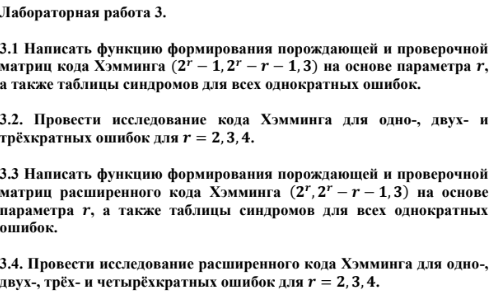

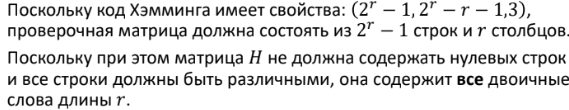

In [ ]:
import numpy as np
import random
#r=2
x_3_1 = np.array([[1, 1]])
#r=3
x_7_4 = np.array([[1, 1, 0],[1, 0, 1],[0, 1, 1],[1, 1, 1]])
#r=4
x_15_11 = np.array([[0, 1, 0, 1],
                       [0, 1, 1, 1],
                       [0, 0, 1, 1],
                       [1, 0, 1, 1],
                       [1, 0, 1, 0],
                       [1, 1, 0, 1],
                       [1, 0, 0, 1],
                       [1, 1, 0, 0],
                       [0, 1, 1, 0],
                       [1, 1, 1, 1],
                       [1, 1, 1, 0]])

#extended hamming code
x_4_1=np.array([[1, 1, 0]])

x_8_4=np.array([[1, 1, 1, 0], [1, 1, 0, 1], [1, 0, 1, 1], [0, 1, 1, 1]])

x_16_11 = np.array([[1, 1, 0, 0],
                           [0, 1, 1, 0],
                           [0, 0, 1, 1],
                           [1, 1, 0, 1],
                           [1, 0, 1, 0],
                           [0, 1, 0, 1],
                           [1, 1, 1, 0],
                           [0, 1, 1, 1],
                           [1, 1, 1, 1],
                           [1, 0, 1, 1],
                           [1, 0, 0, 0]])

# 3.1
def Hamming_generate_matrix(r, x):
    n=(2**r)-1
    k=(2**r)-r-1
    #3=7, 4
    G = np.zeros((k, n))
    I_k = np.eye(k)
    for i in range(k):
        for j in range(k):
          G[i][j] = I_k[i][j]
        for m in range(n - k):
            G[i][k + m] = x[i][m]
    return G

#print(Hamming_generate_matrix(3, x_7_4))

# 3.1 H=[xT, I_n-k]
def Hamming_checking_matrix(r, x):
    n=(2**r)-1
    k=r
    
    H = np.zeros((n, k))
    I = np.eye(len(H)-len(x))

    lenX=len(x)

    for i in range(lenX):
          H[i] = x[i]
    for m in range(len(I)):
          H[m+lenX] = I[m]
    return H
#print("cheking 7_4 ", Hamming_checking_matrix(3, x_7_4))

# 3.3
def Hamming_advanced_generate_matrix(r, x):
    G=Hamming_generate_matrix(r, x)
    print(G)
    b=np.ones((len(G), 1))
    for i in range(len(G)):
      if (sum(G[i])%2 == 0):
        b[i]=0
    G=np.hstack((G, b))  
    return G

# 3.3
def Hamming_advanced_checking_matrix(r, x):
    H=Hamming_checking_matrix(r, x)
    row=np.zeros(( 1, len(H[0])))
    H=np.vstack((H, row))

    column=np.ones((len(H), 1))
    H=np.hstack((H, column))
    #вниз строку и 0, справа столбец из 1
    return H

#print(Hamming_advanced_checking_matrix(3, x_7_4))

def syndromes(G, H):
    return np.dot(G, H) % 2


###!!!!!!!!!!!!!!ДОДЕЛАТЬ ТРЕХ-, ЧЕТЫРЕХ-, КРАТНЫЕ!!!!!!!1 

#copy Лёша тк2
#таблицу синдромов для всех однократных и двукратных ошибок
def syndromes1_2(G,H):
    
    k=len(G)
    n=len(H)

    #однократ
    table_1_syndroms={}

    for i in range(2**(n-k)):
        l = int(bin(i)[2:])
        word=[0 for s in range(k)]
        m=len(word)-1
        while (l>0 and m>0):
            word[m]=l%10
            l=l//10
            m-=1
        word=np.dot(word,G)%2
        for i1 in range(len(word)):
            error = [0 for s in range(len(word))]
            error[i1]=1
            word1=word.copy()
            word1[i1]+=1
            word1[i1]=word1[i1]%2
            word1=np.dot(word1,H)%2
            #if word1.tolist() not in table_1_syndroms:
            key=0
            for v in range(len(word1)):
              key=key*10+word1[v]
            table_1_syndroms[key]=error
    print("syndromes ", table_1_syndroms)


    ##двукрат
    #table_2_syndroms=[]
    #for i in range(2**(n-k)):
    #    l = int(bin(i)[2:])
    #    word=[0 for s in range(k)]
    #    m=len(word)-1
    #    while (l>0):
    #        word[m]=l%10
    #        l=l//10
    #        m-=1
    #    word=np.dot(word,G)%2
    #    for p in range(len(word)):
    #        for y in range(len(word)):
    #            word2=word.copy()
    #            word2[p]+=1
    #            word2[p]=word2[p]%2
    #            word2[y]+=1
    #            word2[y]=word2[y]%2
    #            word2=np.dot(word2,H)%2
    #            table_2_syndroms.append(word2.tolist())
#
    #table_3_syndroms=[]
    #for i in range(2**(n-k)):
    #    l = int(bin(i)[2:])
    #    word=[0 for s in range(k)]
    #    m=len(word)-1
    #    while (l>0):
    #        word[m]=l%10
    #        l=l//10
    #        m-=1
    #    word=np.dot(word,G)%2
    #    for p in range(len(word)):
    #        for y in range(len(word)):
    #          for u in range(len(word)):
    #            word3=word.copy()
    #            word3[p]+=1
    #            word3[p]=word3[p]%2
    #            word3[y]+=1
    #            word3[y]=word3[y]%2
    #            word3[u]+=1
    #            word3[u]=word3[u]%2
    #            word3=np.dot(word3,H)%2
    #            table_3_syndroms.append(word3.tolist())
    #table_4_syndroms=[]
    #for i in range(2**(n-k)):
    #    l = int(bin(i)[2:])
    #    word=[0 for s in range(k)]
    #    m=len(word)-1
    #    while (l>0):
    #        word[m]=l%10
    #        l=l//10
    #        m-=1
    #    word=np.dot(word,G)%2
    #    for i1 in range(len(word)):
    #        for i2 in range(len(word)):
    #          for i3 in range(len(word)):
    #            for i4 in range(len(word)):
    #              word4=word.copy()
    #              word4[i1]+=1
    #              word4[i1]=word4[i1]%2
    #              word4[i2]+=1
    #              word4[i2]=word4[i2]%2
    #              word4[i3]+=1
    #              word4[i3]=word4[i3]%2
    #              word4[i4]+=1
    #              word4[i4]=word4[i4]%2
    #              word4=np.dot(word4,H)%2
    #              table_4_syndroms.append(word4.tolist())
    #"""table_3_syndroms=[]
    #for i1 in range(len(H)):
    #  for i2 in range(i1+1, len(H)):
    #    for i3 in range(i2+1, len(H)):
    #      table_3_syndroms.append(H[i1] + H[i2] + H[i3])
    #table_4_syndroms=[]
    #for i in range(len(H)):
    #  for i1 in range(i+1, len(H)):
    #    for j in range(i1+1, len(H)):
    #      for j1 in range(j+1, len(H)):
    #        table_4_syndroms.append(H[i] + H[i1] + H[j] + H[j1]) """
    #
    return table_1_syndroms#, table_2_syndroms, table_3_syndroms, table_4_syndroms

def syndromes(H, word):
  return np.dot(word,H)%2

#Сформировать кодовое слово длины n из слова длины k. Внести
#однократную ошибку в сформированное слово. Вычислить синдром,
#исправить ошибку с использованием таблицы синдромов. Убедиться
#в правильности полученного слова.
def generate_check_1word(G,H,one_s):
    from random import randint
    k=len(G)
    n=len(H)
    word=np.array([randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    error_number[randint(0,len(word)-1)]=1
    print ("error - ",error_number)
    word = (word + error_number)%2

    print("word+error",word)

    ind=0
    syndrome = syndromes(H, word)
    print("syndrome ",syndrome)

    key_syndrom=0
    for v in range(len(syndrome)):
      key_syndrom=key_syndrom*10+syndrome[v]
    word = (word + one_s[key_syndrom])%2

    test = np.dot(word, H) % 2
    print("check ", test)

    print("correct word ", word[:k])

#двухкратная ошибка
def generate_check_2word(G,H,one_s):
    from random import randint
    k=len(G)
    n=len(H)
    word=np.array([randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    number_of_error = randint(0,len(word)-1)
    error_number[number_of_error]=1
    number_of_error_2 = randint(0,len(word)-1)
    while number_of_error_2 == number_of_error:
        number_of_error_2 = randint(0,len(word)-1)
        
    error_number[number_of_error_2]=1
    print ("error - ",error_number)
    word = (word + error_number)%2

    print("word+error",word)

    ind=0
    syndrome = syndromes(H, word)
    print("syndrome ",syndrome)

    key_syndrom=0
    for v in range(len(syndrome)):
      key_syndrom=key_syndrom*10+syndrome[v]
    if key_syndrom in one_s: 
      word = (word + one_s[key_syndrom])%2

      test = np.dot(word, H) % 2
      print("check ", test)

      print("correct word ", word[:k])
    else:
      print("syndrom not found in check table")


#трёхкратная ошибка 
def generate_check_3word(G,H,one_s):
    k=len(G)
    n=len(H)
    word=np.array([random.randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    number_of_error = random.randint(0,len(word)-1)
    error_number[number_of_error]=1
    number_of_error_2 = random.randint(0,len(word)-1)
    while number_of_error_2 == number_of_error:
        number_of_error_2 = random.randint(0,len(word)-1)
        
    error_number[number_of_error_2]=1
    
    number_of_error_3 = random.randint(0,len(word)-1)
    while number_of_error_3 == number_of_error or number_of_error_3 == number_of_error_2:
        number_of_error_3 = random.randint(0,len(word)-1)
    error_number[number_of_error_3]=1
    
    print ("error3 ",error_number)
    word = (word + error_number)%2

    print("word+error3 ",word)

    ind1=ind2=ind3=-1 #если вдруг инд=0
    syndrome = syndromes(H, word)
    print("syndrome ",syndrome)

    key_syndrom=0
    for v in range(len(syndrome)):
      key_syndrom=key_syndrom*10+syndrome[v]
    if key_syndrom in one_s: 
      word = (word + one_s[key_syndrom])%2
    
      test = np.dot(word, H) % 2
      print("check ", test)

      print("correct word ", word[:k])
    else:
      print("syndrom not found in check table")

#четырёхкратная ошибка 
def generate_check_4word(G,H,one_s):
    k=len(G)
    n=len(H)
    word=np.array([random.randint(0,10)%2 for i in range(k)])
    print("word ", word)
    word = np.dot(word,G)%2
    print("send word ",word)

    #добавим ошибку
    error_number = np.zeros(len(word),dtype=int)
    number_of_error = random.randint(0,len(word)-1)
    error_number[number_of_error]=1
    number_of_error_2 = random.randint(0,len(word)-1)
    while number_of_error_2 == number_of_error:
        number_of_error_2 = random.randint(0,len(word)-1)
        
    error_number[number_of_error_2]=1
    
    number_of_error_3 = random.randint(0,len(word)-1)
    while number_of_error_3 == number_of_error or number_of_error_3 == number_of_error_2:
        number_of_error_3 = random.randint(0,len(word)-1)
    error_number[number_of_error_3]=1
    
    number_of_error_4=random.randint(0,len(word)-1)
    while number_of_error_4 == number_of_error or number_of_error_4 == number_of_error_2 or number_of_error_4 == number_of_error_3:
        number_of_error_4 = random.randint(0,len(word)-1)
    error_number[number_of_error_4]=1

    print ("error3 ",error_number)
    word = (word + error_number)%2

    print("word+error3 ",word)

    ind1=ind2=ind3=-1 #если вдруг инд=0
    syndrome = syndromes(H, word)
    print("syndrome ",syndrome)

    key_syndrom=0
    for v in range(len(syndrome)):
      key_syndrom=key_syndrom*10+syndrome[v]
    if key_syndrom in one_s: 
      word = (word + one_s[key_syndrom])%2
    
      test = np.dot(word, H) % 2
      print("check ", test)

      print("correct word ", word[:k])
    else:
      print("syndrom not found in check table")


def research1(r, x_matrix):
    #однократные ошибки
    n=(2**r)-1
    k=(2**r)-r-1
    
    G = Hamming_generate_matrix(r, x_matrix)
    print("G:\n", G, '\n')

    H = Hamming_checking_matrix(r, x_matrix)
    print("H ", r, '\n', H, '\n')

    #таблица синдромов 1
    one_s=syndromes1_2(G,H)
    
    print("\none-time mistakes")
    generate_check_1word(G,H,one_s)

    #двухкратные ошибки
    print("\ndouble mistakes")
    generate_check_2word(G,H,one_s)

    #трёхкратные ошибки
    print("\nthree-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    generate_check_3word(G,H,one_s)

    #четырехкратные ошибки
    print("\nthree-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    generate_check_3word(G,H,one_s)


def research2(r, x_matrix):
    #однократные ошибки
    n=(2**r)-1
    k=(2**r)-r-1
    
    G = Hamming_advanced_generate_matrix(r, x_matrix)
    print("G:\n", G, '\n')

    H = Hamming_advanced_checking_matrix(r, x_matrix)
    print("H ", r, '\n', H, '\n')

    #таблица синдромов 1
    one_s=syndromes1_2(G,H)
    
    print("\none-time mistakes")
    generate_check_1word(G,H,one_s)

    #двухкратные ошибки
    print("\ndouble mistakes")
    generate_check_2word(G,H,one_s)

    #трёхкратные ошибки
    print("\nthree-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    generate_check_3word(G,H,one_s)

    #четырёхкратные ошибки
    print("\nfour-fold mistakes")
    #three_s=syndromes1_2(G,H)[2]
    generate_check_4word(G,H,one_s)


print("#2")
research1(2, x_3_1)
research1(3, x_7_4)
research1(4, x_15_11) ##########?
print("\n#4")
research2(2, x_3_1)
research2(3, x_7_4)
research2(4, x_15_11)

#2
G:
 [[1. 1. 1.]] 

H  2 
 [[1. 1.]
 [1. 0.]
 [0. 1.]] 

syndromes  {11.0: [1, 0, 0], 10.0: [0, 1, 0], 1.0: [0, 0, 1]}

one-time mistakes
word  [0]
send word  [0. 0. 0.]
error -  [0 1 0]
word+error [0. 1. 0.]
syndrome  [1. 0.]
check  [0. 0.]
correct word  [0.]

double mistakes
word  [1]
send word  [1. 1. 1.]
error -  [1 0 1]
word+error [0. 1. 0.]
syndrome  [1. 0.]
check  [0. 0.]
correct word  [0.]

three-fold mistakes
word  [0]
send word  [0. 0. 0.]
error3  [1 1 1]
word+error3  [1. 1. 1.]
syndrome  [0. 0.]
syndrom not found in check table

three-fold mistakes
word  [1]
send word  [1. 1. 1.]
error3  [1 1 1]
word+error3  [0. 0. 0.]
syndrome  [0. 0.]
syndrom not found in check table
G:
 [[1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1.]] 

H  3 
 [[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]
 [1. 1. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

syndromes  {110.0: [1, 0, 0, 0, 0, 0, 0], 101.0: [0, 1, 0, 0, 0, 0, 0], 11.0: [0, 0, 1, 0, 0, 0, 0], 111.0: [0, 